In [206]:
# Load libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression # Import Logistic Regression
from sklearn.svm import SVC # Import SVM
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Import Random Forest
from sklearn.neighbors import KNeighborsClassifier # Import KNN
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes
from sklearn.metrics import confusion_matrix # Import Confusion Matrix
from sklearn.metrics import classification_report # Import Classification Report
from sklearn.metrics import accuracy_score # Import Accuracy Score
from sklearn.metrics import roc_auc_score # Import ROC AUC Score
from sklearn.metrics import roc_curve # Import ROC Curve
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
from sklearn.model_selection import cross_val_score
from IPython.display import set_matplotlib_formats, display, HTML
import sys
import os
from ipywidgets import interact,widgets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

SEED = 42




# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Hiding all warnings. Not recommended, just for compilation.
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [162]:
# col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
# pima_df = pd.read_csv("./files/Pima_Indian_Diabetes.csv", header=None, names=col_names)
pima = pd.read_csv("./files/Pima_Indian_Diabetes.csv")

In [163]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [164]:
 #['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima_df =  pima.rename(columns={'Pregnancies': 'pregnant', 'Glucose': 'glucose', 'BloodPressure': 'bp', 'SkinThickness': 'skin', 'Insulin': 'insulin', 'BMI': 'bmi', 'DiabetesPedigreeFunction': 'pedigree', 'Age': 'age', 'Outcome': 'label'})
pima_df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [165]:
pima_df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [166]:
pima_df.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [167]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [168]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima_df[feature_cols] # Features
y = pima_df.label # Target variable

In [169]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288


In [170]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [171]:
tsne = TSNE(learning_rate=50,perplexity=50, random_state=SEED)

tsne_features = tsne.fit_transform(X)

tsne_features[1:4,:]

array([[-16.164091 ,   4.993043 ],
       [-39.365498 ,  -0.6975371],
       [ 14.246497 ,  -7.838772 ]], dtype=float32)

In [172]:
X['x'] = tsne_features[:,0]
X['y'] = tsne_features[:,1]

In [173]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree,x,y
0,6,0,33.6,50,148,72,0.627,-35.481472,3.142199
1,1,0,26.6,31,85,66,0.351,-16.164091,4.993043
2,8,0,23.3,32,183,64,0.672,-39.365498,-0.697537
3,1,94,28.1,21,89,66,0.167,14.246497,-7.838772
4,0,168,43.1,33,137,40,2.288,28.384041,-4.385883


<Axes: xlabel='x', ylabel='y'>

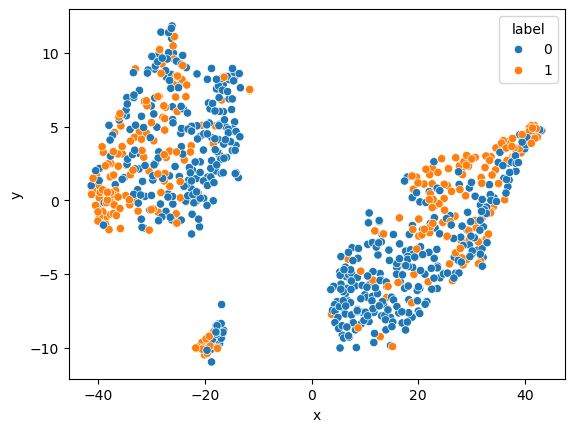

In [174]:
sns.scatterplot(x='x', y='y',hue=y, data=X)



In [175]:
X.drop(['x','y'], axis=1, inplace=True)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y) # 70% training and 30% test

In [194]:
logistic_reg= LogisticRegression(random_state=SEED,C= 0.001, penalty= 'l2', solver = 'newton-cg')
print(logistic_reg.get_params())

params_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
    'penalty': ['l1', 'l2',None,'elasticnet'],
    # 'class_weight': ['dict','balanced', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    # 'dual': [True, False],
    # 'fit_intercept': [True, False],
    # 'intercept_scaling': [0.1, 1, 10, 100],
    # 'l1_ratio': [0.1, 0.5, 0.9],
    # 'max_iter': [None,100, 1000, 10000],
    # 'n_jobs': [None,-1,1, 2, 3, 4, 5],
    # 'tol': [0.0001, 0.001, 0.01, 0.1],
    # 'warm_start': [True, False]
    }

svc = SVC(random_state=SEED,kernel='rbf',probability=True,C= 1.0)
print(svc.get_params())
params_svc = {
'C': [100, 10, 1.0, 0.1, 0.001],
# 'break_ties': [True, False],
# 'cache_size': [200, 400, 600, 800, 1000],
# 'class_weight': ['dict','balanced', None],
# 'coef0': [0.0, 0.1, 0.5, 1.0],
# 'decision_function_shape': ['ovo', 'ovr'],
#  'degree': [2, 3, 4, 5],
# 'gamma': ['scale', 'auto'],
# 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
# 'max_iter': [-1 ,100, 1000, 10000],
# 'probability': [True, False],
# 'shrinking': [True, False],
# 'tol': [0.0001, 0.001, 0.01, 0.1],


}

decision_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 100, max_features= 'sqrt', min_samples_leaf= 2, min_weight_fraction_leaf= 0.1, splitter = 'best')
print(decision_tree.get_params())

params_decision_tree = {
# 'ccp_alpha': [0.0, 0.1, 0.5, 1.0],
# 'class_weight': ['dict','balanced', None],
'criterion': ['gini', 'entropy'],

 'max_depth': [None, 10, 100],
'max_features': [None,'auto', 'sqrt', 'log2'],
# 'min_impurity_decrease': [0.0, 0.1, 0.5, 1.0],
'min_samples_leaf': [1, 2, 3, 4, 5],
# 'min_samples_split': [2, 3, 4, 5],
'min_weight_fraction_leaf': [0.0, 0.1, 0.5, 1.0],
# 'montonic_constraints': [None, [0, 1], [1, 0]],
'splitter': ['best', 'random']
}

knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 7)
print(knn.get_params())
params_knn = {
# 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# 'leaf_size': [10, 20, 30, 40, 50],
'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
# 'metric_params': [None, 'dict'],
# 'n_jobs': [1, 2, 3, 4, 5],
'n_neighbors': [3, 5, 7, 9],
# 'p': [1, 2],
# 'weights': ['uniform', 'distance']
}

classifier_label = [('Decision Tree','decision_tree'),('KNN','knn'),('Logistic Regression','logistic_reg'),('SVC','svc')]



{'C': 0.001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weigh

In [195]:
@interact
def Analyze_Classifiers(classifier_model=classifier_label):
    if classifier_model == 'logistic_reg':
        classifier = logistic_reg
        params = params_logistic
    elif classifier_model == 'svc':
        classifier = svc
        params = params_svc
    elif classifier_model == 'decision_tree':
        classifier = decision_tree
        params = params_decision_tree
    elif classifier_model == 'knn':
        classifier = knn
        params = params_knn
    grid = GridSearchCV(classifier, params)
    grid.fit(X_train, y_train)
    print(f"Best params {grid.best_params_}" )
    print(f"Best Estimator {grid.best_estimator_}")
    y_pred = grid.predict(X_test)
    print(f"Confusion Matrix\n {confusion_matrix(y_test, y_pred)}" )
    print(f"Classification report\n {classification_report(y_test, y_pred)}" )
    print(f"Accuracy score {accuracy_score(y_test, y_pred)}")
    print(f"Roc auc score {roc_auc_score(y_test, y_pred)}")
    y_pred_proba = grid.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

    plt.plot()

    plt.figure(figsize=(10,10))
    
    plt.show()

interactive(children=(Dropdown(description='classifier_model', options=(('Decision Tree', 'decision_tree'), ('…

In [196]:
pipe = Pipeline([
    
    ('scaler', StandardScaler()), 
    ('reducer', PCA(n_components=0.9))])
    
X_train_scaled = pipe.fit_transform(X_train)
X_test_scaled = pipe.transform(X_test)
print(len(pipe['reducer'].components_))
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_train_scaled.describe()

6


In [197]:
X_train_scaled[:10]

array([[-0.24721415,  0.46933815,  0.02957954,  0.06892097,  0.47358701,
        -0.81049479],
       [-0.84016256, -0.07067269,  1.29985006,  0.18871513,  0.70548522,
         0.2378785 ],
       [ 1.45705817,  0.0969592 ,  0.02837139,  0.4082433 ,  0.17781947,
        -1.76457294],
       [-3.36403687, -0.18905983, -1.87099198, -0.49375296,  1.74217401,
         0.15640031],
       [-0.92235077,  0.69533963, -0.10884413, -0.5051213 , -0.70463949,
         0.46502929],
       [-2.91308245, -0.74660042,  1.75104512,  0.97224076, -0.82498753,
        -1.71731235],
       [ 1.48513422,  0.44845307,  1.03193056, -0.29668083, -0.67068442,
         2.53081897],
       [-2.39071777, -0.05355991,  0.32080715, -0.0542523 ,  0.12334041,
        -0.28133942],
       [ 0.90623674,  1.34013983, -0.04205976, -1.32809304, -0.14629733,
        -0.68038419],
       [ 2.20665725, -1.64612361, -0.78387138,  0.48597799, -0.83608553,
        -0.1046394 ]])

In [198]:
X_test_scaled[:10]

array([[-1.09588294e+00,  4.04521144e-01,  7.96515657e-01,
        -4.28353888e-01,  5.96262417e-01,  1.05448572e+00],
       [ 2.37318609e+00,  5.02350740e+00,  1.12368828e+00,
        -2.55462418e+00,  7.47674751e-02, -2.07303860e+00],
       [ 8.92329641e-01, -9.63493288e-01,  6.43662037e-01,
        -2.40001823e-01,  5.07275436e-01, -9.27765369e-01],
       [-2.16195871e+00, -3.07965484e-01, -2.32682112e-01,
         7.43548715e-02, -4.40174004e-01,  2.57059040e-01],
       [ 1.51569269e+00, -2.34342144e+00,  3.40324204e-01,
         1.78827442e-02, -6.91112852e-01,  3.41391531e-01],
       [ 7.22984029e-01, -2.60576058e+00,  1.57954480e-02,
         4.21983007e-01,  1.35175243e-01, -1.29820780e+00],
       [ 3.08447760e+00,  1.65212793e-01, -7.05115261e-01,
         1.42278749e+00, -3.27653747e-02, -9.44480127e-01],
       [ 1.10900163e+00, -1.85329199e+00, -4.00477301e-01,
         4.15374720e-01, -3.63788012e-01, -2.09960728e-01],
       [ 1.30063431e-01,  6.40114566e-01, -6.458

In [199]:
pipe['reducer'].explained_variance_ratio_

array([0.27551662, 0.2079085 , 0.1362527 , 0.12833125, 0.10232628,
       0.09005019])

In [200]:
@interact
def Analyze_Classifiers(classifier_model=classifier_label):
    if classifier_model == 'logistic_reg':
        classifier = logistic_reg
        params = params_logistic
    elif classifier_model == 'svc':
        classifier = svc
        params = params_svc
    elif classifier_model == 'decision_tree':
        classifier = decision_tree
        params = params_decision_tree
    elif classifier_model == 'knn':
        classifier = knn
        params = params_knn
    grid = GridSearchCV(classifier, params)
    grid.fit(X_train_scaled, y_train)
    print(f"Best params {grid.best_params_}" )
    print(f"Best Estimator {grid.best_estimator_}")
    y_pred = grid.predict(X_test_scaled)
    print(f"Confusion Matrix\n {confusion_matrix(y_test, y_pred)}" )
    print(f"Classification report\n {classification_report(y_test, y_pred)}" )
    print(f"Accuracy score {accuracy_score(y_test, y_pred)}")
    print(f"Roc auc score {roc_auc_score(y_test, y_pred)}")
    y_pred_proba = grid.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

    plt.plot()

    plt.figure(figsize=(10,10))
    
    plt.show()

interactive(children=(Dropdown(description='classifier_model', options=(('Decision Tree', 'decision_tree'), ('…

Confusion Matrix
 [[133  17]
 [ 48  33]]
Classification report
               precision    recall  f1-score   support

           0       0.73      0.89      0.80       150
           1       0.66      0.41      0.50        81

    accuracy                           0.72       231
   macro avg       0.70      0.65      0.65       231
weighted avg       0.71      0.72      0.70       231

Accuracy score 0.7186147186147186
Roc auc score 0.6470370370370371


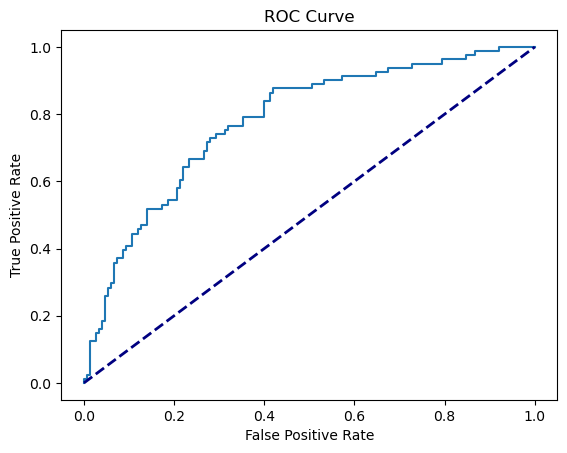

<Figure size 1000x1000 with 0 Axes>

In [201]:
estimator=[]
classifier=None
params =None
for name, model in classifier_label:
    if model == 'logistic_reg':
        classifier = logistic_reg
        params = params_logistic
    elif model == 'svc':
        classifier = svc
        params = params_svc
    elif model == 'decision_tree':
        classifier = decision_tree
        params = params_decision_tree
    elif model == 'knn':
        classifier = knn
        params = params_knn
    grid = GridSearchCV(classifier, params)
    grid.fit(X_train_scaled, y_train)
    estimator.append((name,grid))
VC_hard = VotingClassifier(estimators = estimator, voting ='hard')
VC_hard.fit(X_train_scaled, y_train)
y_pred = VC_hard.predict(X_test_scaled)
print(f"Confusion Matrix\n {confusion_matrix(y_test, y_pred)}" )
print(f"Classification report\n {classification_report(y_test, y_pred)}" )
print(f"Accuracy score {accuracy_score(y_test, y_pred)}")
print(f"Roc auc score {roc_auc_score(y_test, y_pred)}")
y_pred_proba = grid.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.plot()

plt.figure(figsize=(10,10))
    
plt.show()

In [202]:
@interact
def Analyze_BaggingClassifiers(classifier_model=classifier_label):
    if classifier_model == 'logistic_reg':
        classifier = logistic_reg
        params = params_logistic
    elif classifier_model == 'svc':
        classifier = svc
        params = params_svc
    elif classifier_model == 'decision_tree':
        classifier = decision_tree
        params = params_decision_tree
    elif classifier_model == 'knn':
        classifier = knn
        params = params_knn
    bc_params= {} 
    for key,value in params.items():
        # print(f"{key} : {value}")
        bc_params['estimator__' + key] = value

    # print(bc_params)
    # bc_params["bootstrap_features"]= [False, True] # Whether features are drawn with replacement.
    # bc_params["max_features"]= [0.5, 0.7, 1.0] # The number of features to draw from X to train each base estimator.
    # bc_params["max_samples"]= [0.5, 0.7, 1.0] # The number of samples to draw from X to train each base estimator.
    # bc_params["n_estimators"]= [2, 5, 10, 20] # The number of base estimators in the ensemble.
    # bc_params["bootstrap"]= [True, False] # Whether samples are drawn with replacement. If False, sampling without replacement is performed.
    # bc_params["oob_score"]= [True, False] # Whether to use out-of-bag samples to estimate the generalization error.
    # bc_params["warm_start"] = [True, False] # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.


    bc_gs = GridSearchCV(BaggingClassifier(classifier), bc_params, cv=5, verbose=1) 
    bc_gs.fit(X_train_scaled, y_train)
    print(f"Best params {bc_gs.best_params_}" )
    print(f"Best Estimator {bc_gs.best_estimator_}")
    y_pred = bc_gs.predict(X_test_scaled)
    print(f"Confusion Matrix\n {confusion_matrix(y_test, y_pred)}" )
    print(f"Classification report\n {classification_report(y_test, y_pred)}" )
    print(f"Accuracy score {accuracy_score(y_test, y_pred)}")
    print(f"Roc auc score {roc_auc_score(y_test, y_pred)}")
    y_pred_proba = bc_gs.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

    plt.plot()

    plt.figure(figsize=(10,10))
    
    plt.show()

interactive(children=(Dropdown(description='classifier_model', options=(('Decision Tree', 'decision_tree'), ('…

Best params {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator RandomForestClassifier(min_samples_leaf=4, random_state=42)
Confusion Matrix
 [[125  25]
 [ 41  40]]
Classification report
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       150
           1       0.62      0.49      0.55        81

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.71       231

Accuracy score 0.7142857142857143
Roc auc score 0.6635802469135803


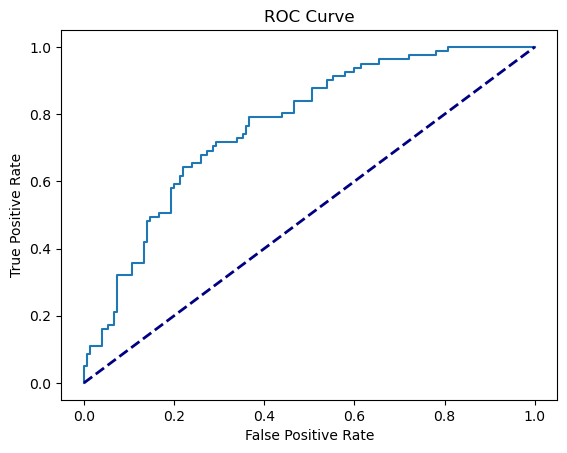

<Figure size 1000x1000 with 0 Axes>

In [203]:
randomForest = RandomForestClassifier(random_state=SEED)
randomForest.get_params()

params_randomForest = {
'n_estimators': [100], #  number of trees in the foreset
'max_features': ['auto', 'sqrt', 'log2'], # max number of features considered for splitting a node
'max_depth' : [ None, 10], # max number of levels in each decision tree
'min_samples_split': [2, 5, 10], # min number of data points placed in a node before the node is split
'min_samples_leaf': [1, 2, 4], # min number of data points allowed in a leaf node
'bootstrap': [True, False] # method for sampling data points (with or without replacement)

}

grid = GridSearchCV(randomForest, params_randomForest,cv=5,n_jobs=-1,verbose=0) 
grid.fit(X_train_scaled, y_train)
print(f"Best params {grid.best_params_}" )
print(f"Best Estimator {grid.best_estimator_}")
y_pred = grid.predict(X_test_scaled)
print(f"Confusion Matrix\n {confusion_matrix(y_test, y_pred)}" )
print(f"Classification report\n {classification_report(y_test, y_pred)}" )
print(f"Accuracy score {accuracy_score(y_test, y_pred)}")
print(f"Roc auc score {roc_auc_score(y_test, y_pred)}")
y_pred_proba = grid.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.plot()

plt.figure(figsize=(10,10))

plt.show()


/home/izzumani/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/izzumani/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/izzumani/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/izzumani/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Best params {'learning_rate': 0.1, 'n_estimators': 50}
Best Estimator AdaBoostClassifier(learning_rate=0.1, random_state=42)
Confusion Matrix
 [[126  24]
 [ 39  42]]
Classification report
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       150
           1       0.64      0.52      0.57        81

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231

Accuracy score 0.7272727272727273
Roc auc score 0.6792592592592592


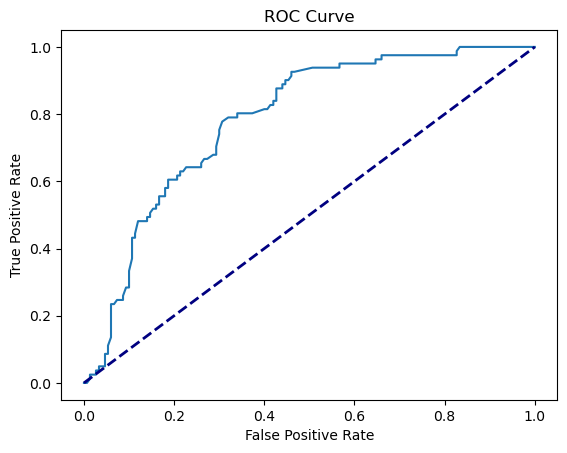

In [204]:
adaBoost = AdaBoostClassifier(random_state=SEED)
adaBoost.get_params()
params_adaBoost = {
'n_estimators': [50, 100, 200], #  number of trees in the foreset
'learning_rate': [0.01, 0.1, 1.0,10], #  learning rate shrinks the contribution of each classifier

}

grid = GridSearchCV(adaBoost, params_adaBoost,cv=5,n_jobs=-1,verbose=0)
grid.fit(X_train_scaled, y_train)
print(f"Best params {grid.best_params_}" )
print(f"Best Estimator {grid.best_estimator_}")
y_pred = grid.predict(X_test_scaled)
print(f"Confusion Matrix\n {confusion_matrix(y_test, y_pred)}" )
print(f"Classification report\n {classification_report(y_test, y_pred)}" )
print(f"Accuracy score {accuracy_score(y_test, y_pred)}")
print(f"Roc auc score {roc_auc_score(y_test, y_pred)}")
y_pred_proba = grid.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()  


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params {'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 100, 'subsample': 0.7}
Best Estimator GradientBoostingClassifier(learning_rate=0.01, loss='exponential',
                           random_state=42, subsample=0.7)
Confusion Matrix
 [[131  19]
 [ 49  32]]
Classification report
               precision    recall  f1-score   support

           0       0.73      0.87      0.79       150
           1       0.63      0.40      0.48        81

    accuracy                           0.71       231
   macro avg       0.68      0.63      0.64       231
weighted avg       0.69      0.71      0.69       231

Accuracy score 0.7056277056277056
Roc auc score 0.6341975308641975


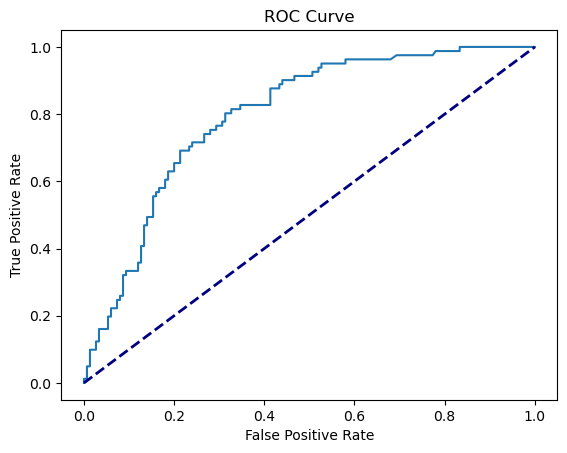

In [205]:
gradientBosting = GradientBoostingClassifier(random_state=SEED)
gradientBosting.get_params()
params_gradientBosting = {
   'loss': ['deviance', 'exponential'], # loss function to be optimized
   'learning_rate': [0.01, 0.1, 1.0,10], #  learning rate shrinks the contribution of each classifier
   'n_estimators': [50, 100, 200], #  number of trees in the foreset
   'subsample': [0.5, 0.7, 1.0], # The fraction of samples to be used for fitting the individual base learners.
}
grid = GridSearchCV(gradientBosting, params_gradientBosting,cv=5,n_jobs=-1,verbose=1)
grid.fit(X_train_scaled, y_train)
print(f"Best params {grid.best_params_}" )
print(f"Best Estimator {grid.best_estimator_}")
y_pred = grid.predict(X_test_scaled)
print(f"Confusion Matrix\n {confusion_matrix(y_test, y_pred)}" )
print(f"Classification report\n {classification_report(y_test, y_pred)}" )
print(f"Accuracy score {accuracy_score(y_test, y_pred)}")
print(f"Roc auc score {roc_auc_score(y_test, y_pred)}")
y_pred_proba = grid.predict_proba(X_test_scaled)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()